Code to prep images of M101 and its supernova. The students will look at three images:
* One that only has the short baselines.
* One that only has the long baselines.
* One that has a mix of long and short baselines (but neither is as well sampled as just sampling short or long baselines).

In [1]:
from astropy.io import fits
from convenience_functions import show_image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib.colors import LogNorm

#Create a function that will plot the 2D Fourier Transform on a logarithmic scale
def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft),norm=LogNorm(vmin=5))
    plt.axvline(im_fft.shape[1]/2,color='r',ls='--')
    plt.axhline(im_fft.shape[0]/2,color='r',ls='--')
    plt.colorbar()

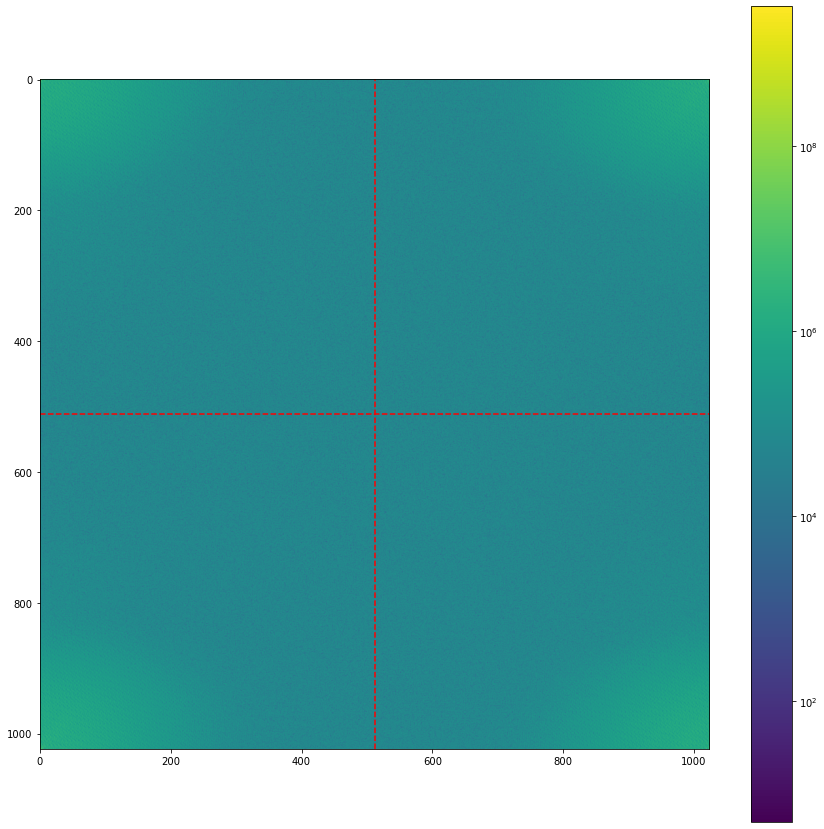

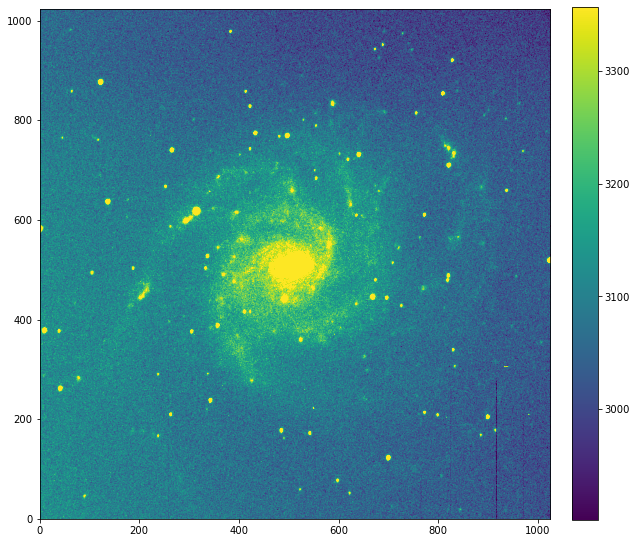

In [7]:
# Original image
image = fits.open('M101_052223.fits')
data = image[0].data
hdr = image[0].header
#Create and plot the Fourier Transform
fft_m101 = np.fft.fft2(data) #Takes a two-dimensional Fourier transform
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_m101)

new_data = np.fft.ifft2(fft_m101).real #Take the inverse Fourier Transform, which reconstructs an image
show_image(new_data)

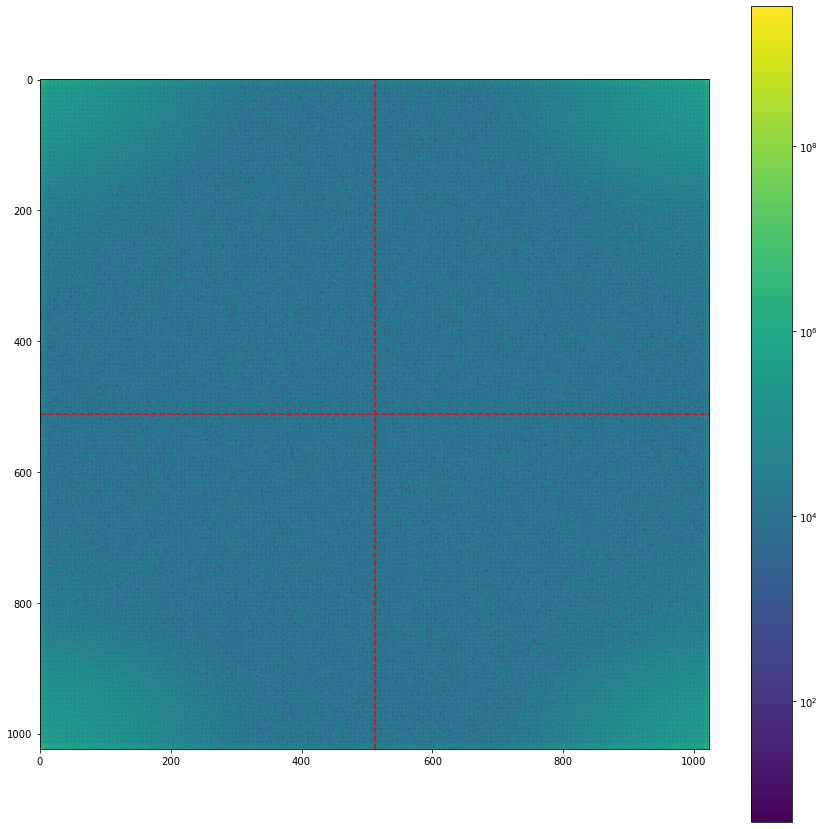

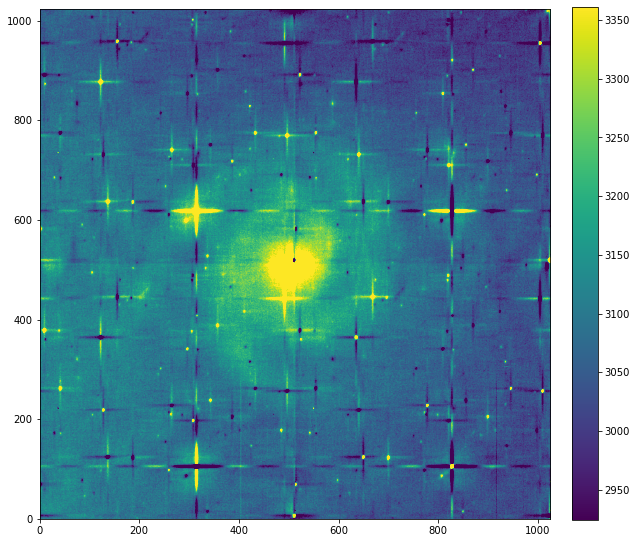

In [8]:
#Some short and long baseline sampling
fft_m101_copy = fft_m101.copy()
fft_m101_copy[10:np.shape(fft_m101)[0]-8:2,:] = 0 #Simulates a situation in which are missing information on every tenth frequency 
fft_m101_copy[:,10:np.shape(fft_m101)[1]-8:2] = 0
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_m101_copy)

new_data = np.fft.ifft2(fft_m101_copy).real #Take the inverse Fourier Transform, which reconstructs an image
show_image(new_data)

hdu = fits.PrimaryHDU(new_data,hdr)
hdu.writeto('M101_short+long.fits')

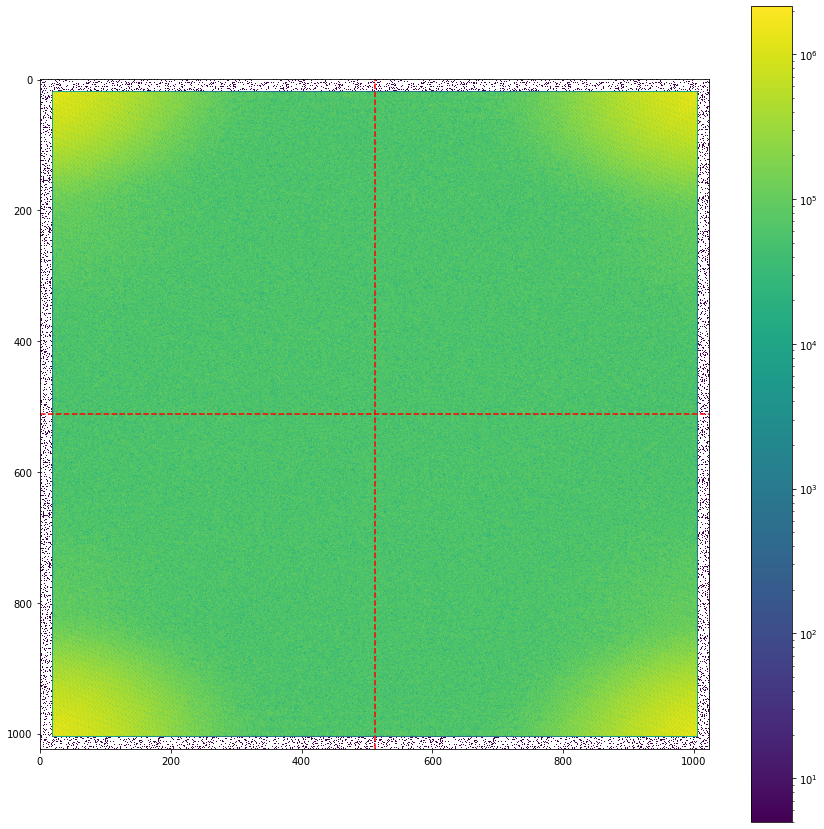

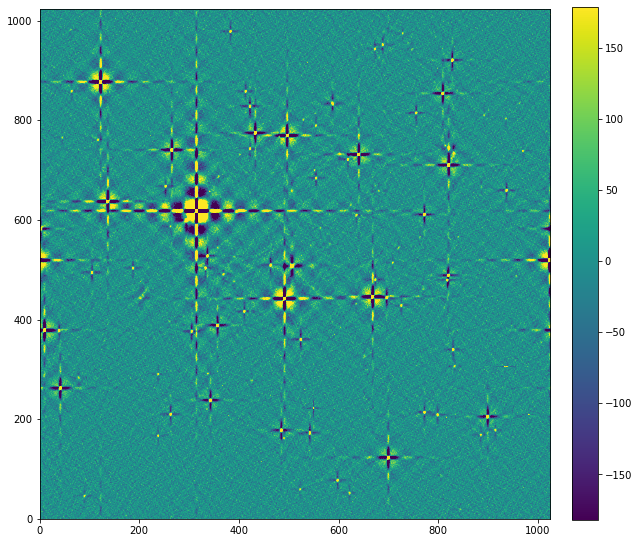

In [9]:
#Just high frequencies
fft_m101_copy = fft_m101.copy()
fft_m101_copy[:20,:] = 0
fft_m101_copy[np.shape(fft_m101)[0]-20:,:] = 0
fft_m101_copy[:,:20] = 0
fft_m101_copy[:,np.shape(fft_m101)[1]-20:] = 0
fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_m101_copy)

new_data = np.fft.ifft2(fft_m101_copy).real #Take the inverse Fourier Transform, which reconstructs an image
show_image(new_data)

hdu = fits.PrimaryHDU(new_data,hdr)
hdu.writeto('M101_longonly.fits')

<Figure size 1080x1080 with 0 Axes>

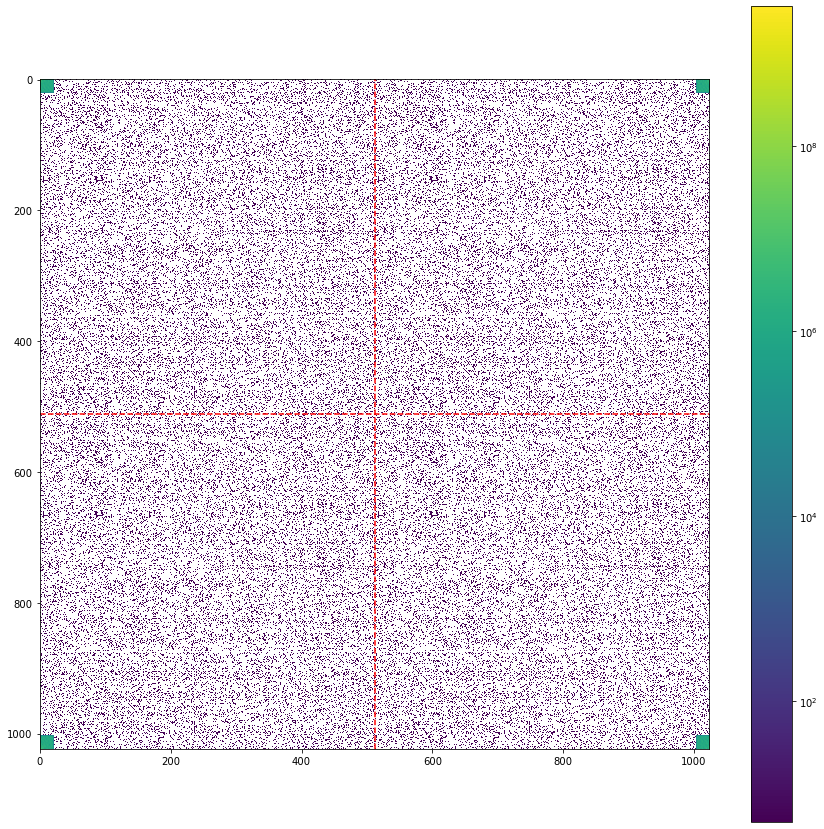

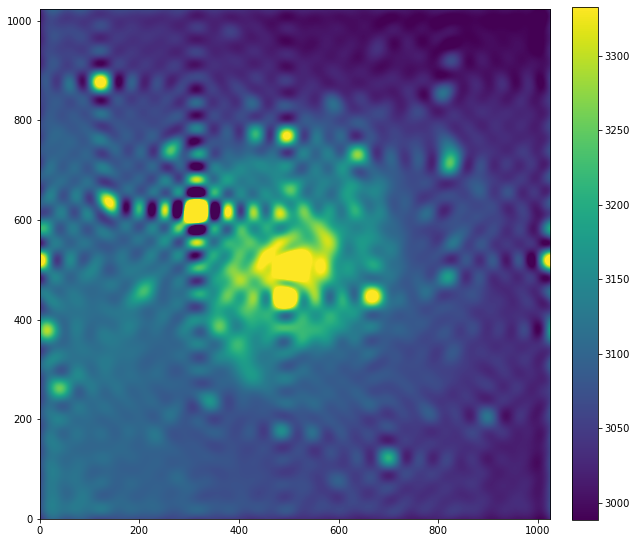

In [10]:
#Just low frequencies
fft_m101_copy = fft_m101.copy() #Copy the Fourier Transform into a new variable
fig = plt.figure(figsize=(15,15))
fft_m101_copy[20:np.shape(fft_m101)[0]-20,:] = 0 #Set the Fourier Transform to zero everywhere except for the first, and last, twenty frequencies
fft_m101_copy[:,20:np.shape(fft_m101)[1]-20] = 0 #Same as above but in the Y-direction

fig = plt.figure(figsize=(15,15))
plot_spectrum(fft_m101_copy)

new_data = np.fft.ifft2(fft_m101_copy).real #Take the inverse Fourier Transform, which reconstructs an image
show_image(new_data)

hdu = fits.PrimaryHDU(new_data,hdr)
hdu.writeto('M101_shortonly.fits')

(0.0, 0.01)

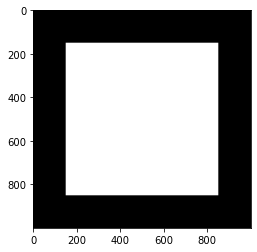

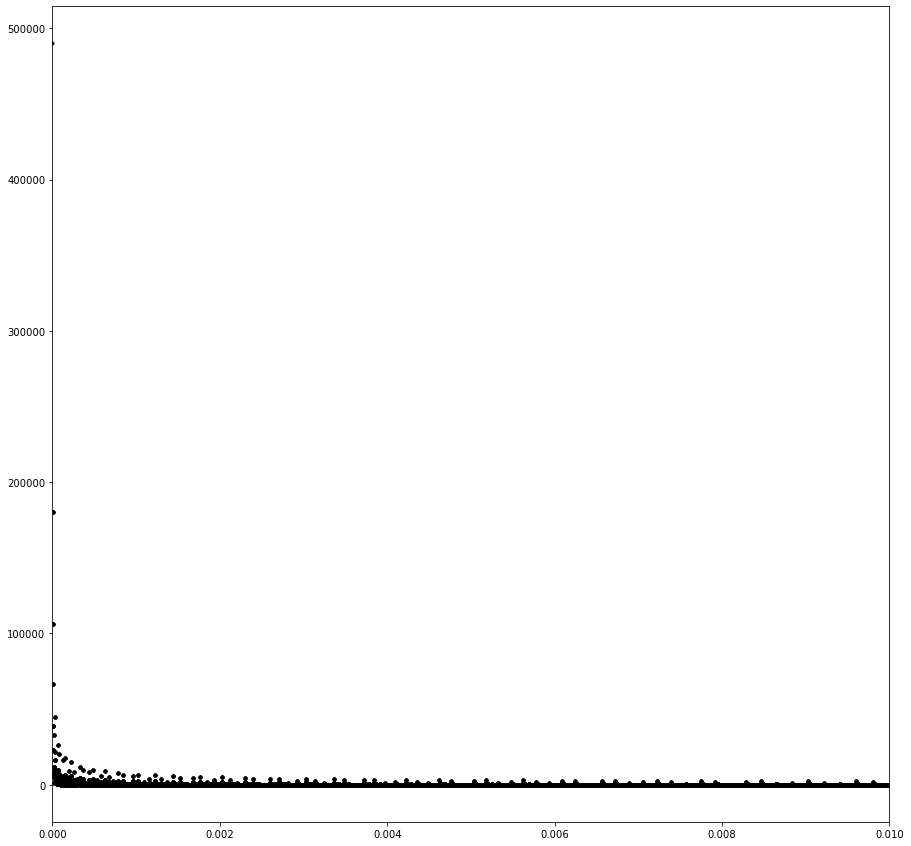

In [41]:
fake_telescope = np.zeros((1000,1000))
fake_telescope[150:850,150:850] = 1
plt.imshow(fake_telescope,plt.cm.gray)

fft_ch = np.fft.fft2(fake_telescope) #Takes a two-dimensional Fourier transform
fig = plt.figure(figsize=(15,15))
#plot_spectrum(fft_ch)

kx = np.fft.fftfreq(fake_telescope.shape[0]) #What does this line do?
ky = np.fft.fftfreq(fake_telescope.shape[1])
kxm,kym = np.meshgrid(kx,ky)
plt.plot(kxm.flatten()**2.+kym.flatten()**2.,np.abs(fft_ch.flatten()),'.k')
plt.xlim(0,.01)

(0.0, 0.01)

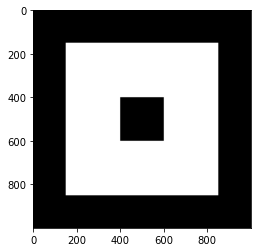

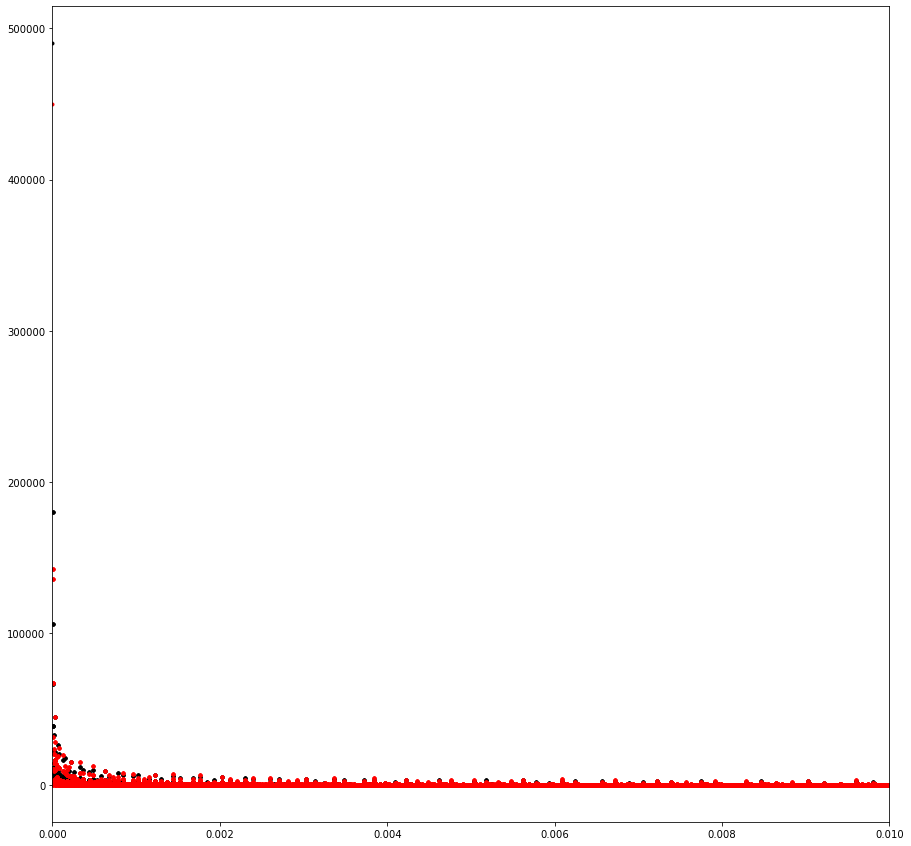

In [42]:
fake_telescope2 = np.zeros((1000,1000))
fake_telescope2[150:850,150:850] = 1
fake_telescope2[400:600,400:600] = 0
plt.imshow(fake_telescope2,plt.cm.gray)

fft_ch2 = np.fft.fft2(fake_telescope2) #Takes a two-dimensional Fourier transform
fig = plt.figure(figsize=(15,15))
#plot_spectrum(fft_ch)

kx = np.fft.fftfreq(fake_telescope2.shape[0]) #What does this line do?
ky = np.fft.fftfreq(fake_telescope2.shape[1])
kxm,kym = np.meshgrid(kx,ky)
plt.plot(kxm.flatten()**2.+kym.flatten()**2.,np.abs(fft_ch.flatten()),'.k')
plt.plot(kxm.flatten()**2.+kym.flatten()**2.,np.abs(fft_ch2.flatten()),'.r')
plt.xlim(0,.01)

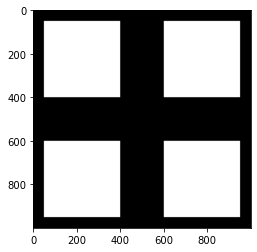

<Figure size 1080x1080 with 0 Axes>

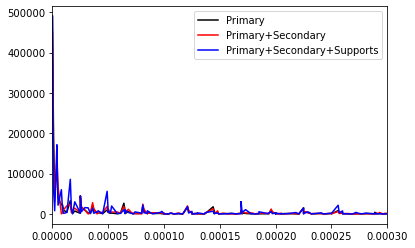

In [44]:
fake_telescope3 = np.zeros((1000,1000))
fake_telescope3[50:950,50:950] = 1
fake_telescope3[400:600,400:600] = 0
fake_telescope3[400:600,:] = 0
fake_telescope3[:,400:600] = 0
plt.imshow(fake_telescope3,plt.cm.gray)

fft_ch3 = np.fft.fft2(fake_telescope3) #Takes a two-dimensional Fourier transform
fig = plt.figure(figsize=(15,15))
#plot_spectrum(fft_ch3)

plt.figure()
kx = np.fft.fftfreq(fake_telescope3.shape[0]) #What does this line do?
ky = np.fft.fftfreq(fake_telescope3.shape[1])
kxm,kym = np.meshgrid(kx,ky)
ws = np.argsort(kxm.flatten()**2.+kym.flatten()**2.)
plt.plot((kxm.flatten()**2.+kym.flatten()**2.)[ws],np.abs(fft_ch.flatten())[ws],'k',label='Primary')
plt.plot((kxm.flatten()**2.+kym.flatten()**2.)[ws],np.abs(fft_ch2.flatten())[ws],'r',label='Primary+Secondary')
plt.plot((kxm.flatten()**2.+kym.flatten()**2.)[ws],np.abs(fft_ch3.flatten())[ws],'b',label='Primary+Secondary+Supports')
plt.xlim(0,.0003)
plt.legend()